In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Đọc dữ liệu
df_clean = pd.read_csv("gold_prices_cleaned.csv")
# Vì kiểu dữ liệu cột Date đang ở dạng object
# -> Chuyển kiểu dữ liệu cột Date sang datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean.dtypes
# Đảm bảo dữ liệu được sắp xếp theo thời gian
df_clean = df_clean.sort_values(by='Date')

# Xây dựng và đánh giá mô hình LinearRegression_Model
*Nhằm so sánh với mô hình ARIMA, để thấy vì sao ARIMA phù hợp hơn*

## 1. Thêm cột Time

In [ ]:
import numpy as np
df_clean['Time'] = np.arange(len(df_clean.index))
df_clean.head()

,Date,Buy Price,Sell Price,Time
0,2009-08-01,21.13,21.19,0
1,2009-08-02,21.13,21.19,1
2,2009-08-03,21.13,21.19,2
3,2009-08-04,21.13,21.19,3
4,2009-08-05,21.13,21.19,4


## 2. Xây dựng mô hình

### Giá mua

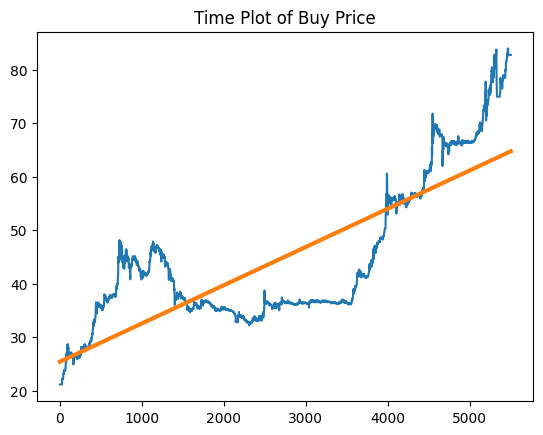

In [ ]:
from sklearn.linear_model import LinearRegression
# Xác định các giá trị dự đoán
# Dữ liệu huấn luyện
X = df_clean.loc[:, ['Time']]  # đặc trưng
y = df_clean.loc[:, 'Buy Price']  # mục tiêu

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Lưu các giá trị dự đoán dưới dạng chuỗi thời gian với cùng chỉ số thời gian như dữ liệu huấn luyện
y_pred_Buy = pd.Series(model.predict(X), index=X.index)

# Vẽ biểu đồ cho y và y dự đoán
ax = y.plot()
ax = y_pred_Buy.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Buy Price');

### Giá bán

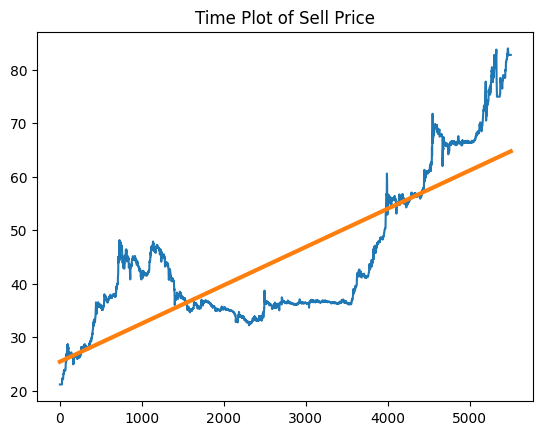

In [18]:
# Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Lưu các giá trị dự đoán dưới dạng chuỗi thời gian với cùng chỉ số thời gian như dữ liệu huấn luyện
y_predSell = pd.Series(model.predict(X), index=X.index)

# Vẽ biểu đồ cho y và y dự đoán
ax = y.plot()
ax = y_predSell.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Sell Price');

## 3. Đánh giá mô hình Linear Regression

### Giá mua

In [25]:
# Tính MAD (Mean Absolute Deviation - Độ lệch tuyệt đối trung bình)
mad = (y - y_pred_Buy).abs().mean()

# Tính SSE (Sum of Squared Errors - Tổng bình phương sai số)
sse = ((y - y_pred_Buy) ** 2).sum()

print(f"MAD (Buy Price): {mad}")
print(f"SSE (Buy Price): {sse}")

MAD (Buy Price): 7.319092739280633
SSE (Buy Price): 408894.5784644048


### Giá bán

In [26]:
# Tính MAD (Mean Absolute Deviation - Độ lệch tuyệt đối trung bình)
mad = (y - y_pred_Sell).abs().mean()

# Tính SSE (Sum of Squared Errors - Tổng bình phương sai số)
sse = ((y - y_pred_Sell) ** 2).sum()

print(f"MAD (Sell Price): {mad}")
print(f"SSE (Sell Price): {sse}")


MAD (Sell Price): 7.319092739280633
SSE (Sell Price): 408894.5784644048
